In [43]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import os
import shap
import tensorflow as tf
from numpy import load
import numpy as np


In [75]:
basepath = "/content/drive/MyDrive/CV"
img_size = "50"

In [76]:
if img_size == "150":
    x_test = load(os.path.join(basepath, "data_test_160.npz"))['arr_0']
    x_train = load(os.path.join(basepath, "data_train_160.npz"))['arr_0']
    y_test = load(os.path.join(basepath, "labels_test.npz"))['arr_0']
    y_train = load(os.path.join(basepath, "labels_train.npz"))['arr_0']
elif img_size == "50":
    x_test = load(os.path.join(basepath, "sub_data_test_96.npz"))['arr_0']
    x_train = load(os.path.join(basepath, "sub_data_train_96.npz"))['arr_0']
    y_test = load(os.path.join(basepath, "sub_labels_test.npz"))['arr_0']
    y_train = load(os.path.join(basepath, "sub_labels_train.npz"))['arr_0']
print('Shape x_test: ', x_test.shape)
print('Shape x_train: ', x_train.shape)
print('Shape y_test: ', y_test.shape)
print('Shape y_train: ', y_train.shape)

Shape x_test:  (9000, 96, 96, 3)
Shape x_train:  (36000, 96, 96, 3)
Shape y_test:  (9000,)
Shape y_train:  (36000,)


In [77]:
# Label Names
classes =  np.unique(y_train)
class_labels = ["Tumor", "Stroma", "Complex", "Lympho", "Debris", "Mucosa", "Adipose", "Empty"]
mapping = dict(zip(classes, class_labels))

In [78]:
model = tf.keras.models.load_model("/content/model_imgsize_50_epochs_30_LR_0.0001_BS_32_time_02_09_2023_15_19_07_PretrainedMobileNetV2_Flatten_4Dense_Dropout_Dense (1).h5")

In [79]:
shap.initjs()

masker = shap.maskers.Image("inpaint_telea", x_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [80]:
shap_values = explainer(x_test[:4], outputs=shap.Explanation.argsort.flip[:8])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 3/4 [00:30<00:07,  7.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 4/4 [00:45<00:00, 10.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 5it [01:02, 15.64s/it]


(4, 96, 96, 3, 8)

In [81]:
print("Actual Labels    : {}".format([mapping[i] for i in y_test[:4]]))
probs = model.predict(x_test[:4])
print("Predicted Labels : {}".format([mapping[i+1] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))

Actual Labels    : ['Empty', 'Stroma', 'Adipose', 'Complex']


1/1 [==============================] - 1s 1s/step
Predicted Labels : ['Empty', 'Complex', 'Adipose', 'Complex']
Probabilities : [0.970941   0.55971146 0.78081775 0.49204352]


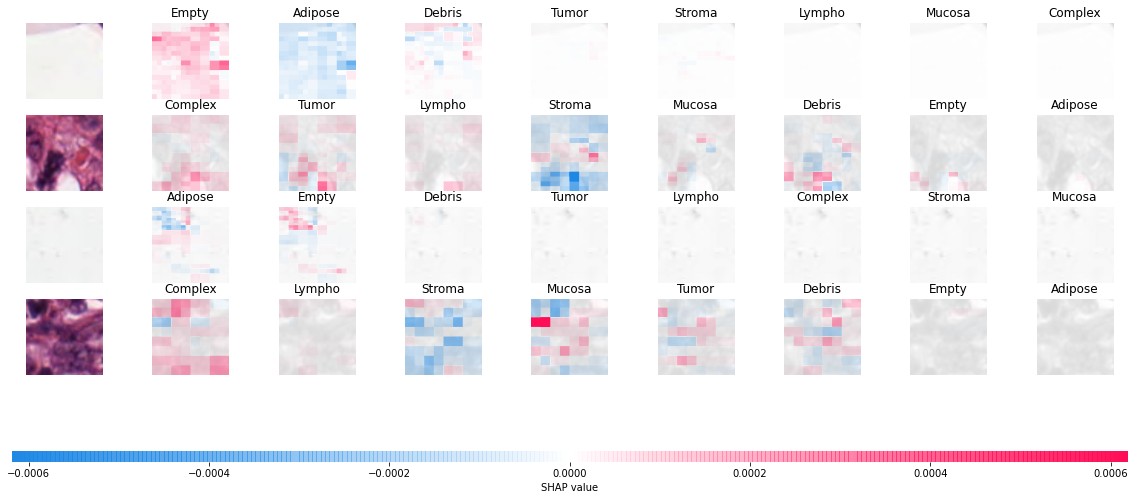

In [54]:
shap.image_plot(shap_values)

## Test on Tumors



In [82]:
t_test = list()
t_label = list()
for i, (img, label) in enumerate(zip(x_test, y_test)):
  if label == 1:
    t_test.append(img)
    t_label.append(label)

t_test = np.array(t_test)
t_label = np.array(t_label)

In [99]:
shap.initjs()

masker = shap.maskers.Image("inpaint_telea", x_train[0].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [100]:
shap_values = explainer(t_test[:10], outputs=shap.Explanation.argsort.flip[:8])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 3/10 [00:28<00:47,  6.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 4/10 [00:45<01:05, 10.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 5/10 [01:00<01:02, 12.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 6/10 [01:16<00:54, 13.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 7/10 [01:30<00:41, 13.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 8/10 [01:47<00:29, 14.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 9/10 [02:01<00:14, 14.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 10/10 [02:15<00:00, 14.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 11it [02:30, 15.04s/it]


(10, 96, 96, 3, 8)

In [102]:
print("Actual Labels    : {}".format([mapping[i] for i in t_label[:10]]))
probs = model.predict(t_test[:10])
print("Predicted Labels : {}".format([mapping[i+1] for i in np.argmax(probs, axis=1)]))
print("Probabilities : {}".format(np.max(probs, axis=1)))

Actual Labels    : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor']
1/1 [==============================] - 0s 96ms/step
Predicted Labels : ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Debris', 'Tumor', 'Tumor', 'Tumor']
Probabilities : [0.8267585  0.9016623  0.8228436  0.86091214 0.9717215  0.87527555
 0.66946733 0.7507274  0.7655798  0.816832  ]


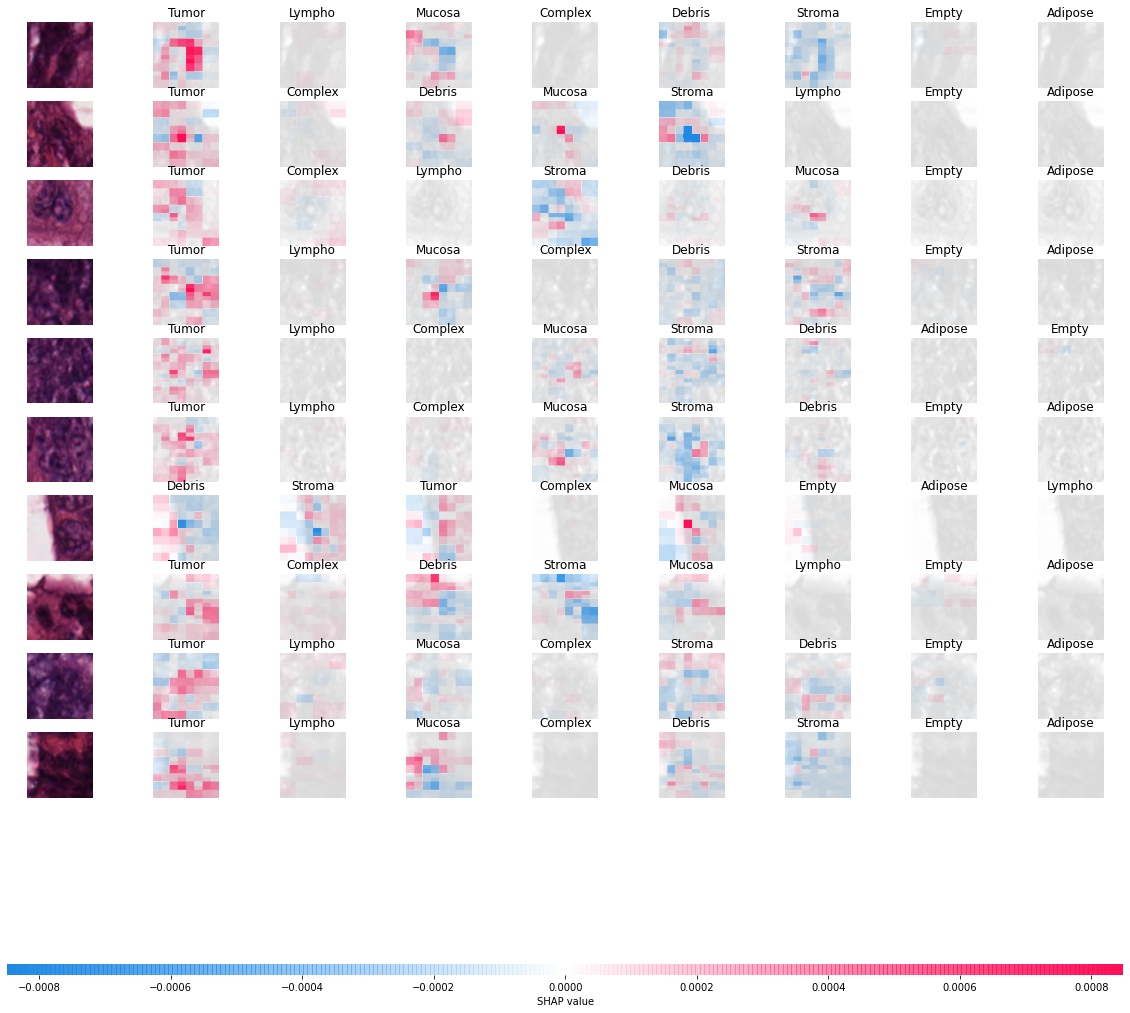

In [103]:
shap.image_plot(shap_values)